# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [2]:
import pandas as pd 

# To avoid consistency errors, copy the results from each server to 
# separate directories. The files from these directories are merged here.

icarus_experiments = pd.read_csv("results/icarus/experiments.csv", delimiter=";")
romulus_experiments = pd.read_csv("results/romulus/experiments.csv", delimiter=";")
experiments = pd.concat([icarus_experiments, romulus_experiments], ignore_index=True)

icarus_events = pd.read_csv("results/icarus/events.csv", delimiter=";")
romulus_events = pd.read_csv("results/romulus/events.csv", delimiter=";")
events = pd.concat([icarus_events, romulus_events], ignore_index=True)

icarus_fitness_values = pd.read_csv("results/icarus/fitness_values.csv", delimiter=";")
romulus_fitness_values = pd.read_csv("results/romulus/fitness_values.csv", delimiter=";")
fitness_values = pd.concat([icarus_fitness_values, romulus_fitness_values], ignore_index=True)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_70931/1999050712.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Remove potential trailing white spaces from column names
experiments.columns = experiments.columns.str.strip()
events.columns = events.columns.str.strip()
fitness_values.columns = fitness_values.columns.str.strip()

In [4]:
from datetime import datetime

experiments["created_at"] = experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
events["created_at"] = events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
fitness_values["created_at"] = fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [5]:
def extract_fitness(fitness: str) -> str:
    fitness = fitness.split()[0]
    fitness = fitness.split(".")[-1]
    return fitness

experiments["fitness"] = experiments["fitness"].apply(lambda x: extract_fitness(x))

In [15]:
def create_configuration(fitness: str, description: str) -> str:
    if description.strip() == "":
        return f"{fitness}; no abstraction learning"
    else:
        return f"{fitness}; {description.strip()}"

experiments["configuration"] = experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)

/var/folders/8q/rp8w2yvx1wq18fndqwtvqx340000gn/T/ipykernel_70931/3220056109.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  experiments["configuration"] = experiments[["fitness", "description"]].apply(lambda row: create_configuration(row[0], row[1]), axis=1)


In [16]:
experiments = experiments.sort_values(by=["created_at"], ascending=True)
events = events.sort_values(by=["created_at"], ascending=True)
fitness_values = fitness_values.sort_values(by=["created_at"], ascending=True)

## Visualize Fitness Value Changes By Experiment

In [17]:
experiments

,experiment_id,description,ga_params,gate_set,fitness,fitness_params,optimizer,optimizer_params,created_at,last_commit_id,configuration
0,grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea6...,,"GAParams(population_size=1000, generations=80...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-26 08:46:33.399034,016489a2b9c58ccf0eb818f6eafc9cf4fee2778a,BaselineFitness; no abstraction learning
38,grover_3qubits_3122e137-b9f3-45da-8987-d470e49...,,"GAParams(population_size=1000, generations=80...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-26 08:47:33.776634,016489a2b9c58ccf0eb818f6eafc9cf4fee2778a,BaselineFitness; no abstraction learning
1,grover_3qubits_71b8268a-9080-42fc-b339-ea0e979...,,"GAParams(population_size=1000, generations=80...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-27 20:37:48.350085,016489a2b9c58ccf0eb818f6eafc9cf4fee2778a,IndirectQAFitness; no abstraction learning
39,grover_3qubits_48bc103e-a133-4ff8-b463-83eac2c...,,"GAParams(population_size=1000, generations=80...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-28 08:27:20.966334,016489a2b9c58ccf0eb818f6eafc9cf4fee2778a,IndirectQAFitness; no abstraction learning
2,grover_3qubits_3df568fa-7400-4020-8400-a83df28...,,"GAParams(population_size=1000, generations=80...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",DirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-29 16:18:51.978841,016489a2b9c58ccf0eb818f6eafc9cf4fee2778a,DirectQAFitness; no abstraction learning
...,...,...,...,...,...,...,...,...,...,...,...
33,bernstein_vazirani_3qubits_55698cdc-cfab-48e5-...,,"GAParams(population_size=1000, generations=50...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=4, measurement_qubi...",2024-05-11 09:54:42.055484,cb49eea162c4d2d6c08814a9d60cf15ae9ff0f61,IndirectQAFitness; no abstraction learning
34,bernstein_vazirani_3qubits_303440c4-062d-4063-...,,"GAParams(population_size=1000, generations=50...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",DirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=4, measurement_qubi...",2024-05-11 11:21:34.522989,cb49eea162c4d2d6c08814a9d60cf15ae9ff0f61,DirectQAFitness; no abstraction learning
35,bernstein_vazirani_3qubits_ffe6b734-2570-4cec-...,abstraction learning enabled,"GAParams(population_size=1000, generations=50...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",BaselineFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=4, measurement_qubi...",2024-05-11 12:27:42.299039,cb49eea162c4d2d6c08814a9d60cf15ae9ff0f61,BaselineFitness; abstraction learning enabled
36,bernstein_vazirani_3qubits_896274d6-97a3-429c-...,abstraction learning enabled,"GAParams(population_size=1000, generations=50...","[<class 'gates.h.H'>,<class 'gates.cx.CX'>,<c...",IndirectQAFitness,"FitnessParams(validity_checks=[], classical_o...",<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams

Experiment Id: grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea64468c
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-26 08:48:02.176056 - 2024-04-27 04:54:15.290400


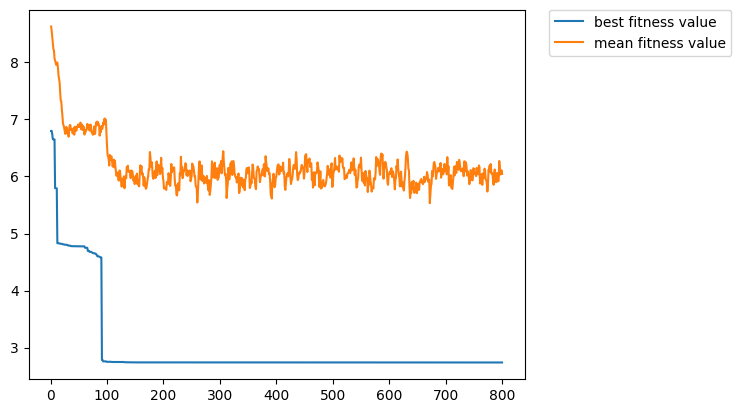

Experiment Id: grover_3qubits_3122e137-b9f3-45da-8987-d470e494c774
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-26 08:50:16.363809 - 2024-04-27 22:28:00.917024


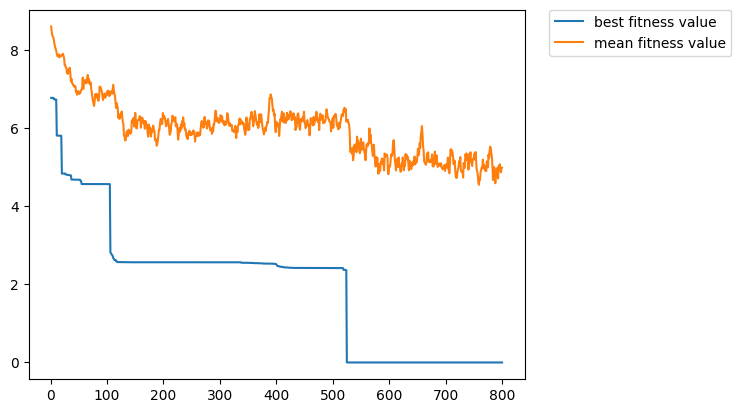

Experiment Id: grover_3qubits_71b8268a-9080-42fc-b339-ea0e97936f6a
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-27 20:39:12.857013 - 2024-04-28 18:03:40.433681


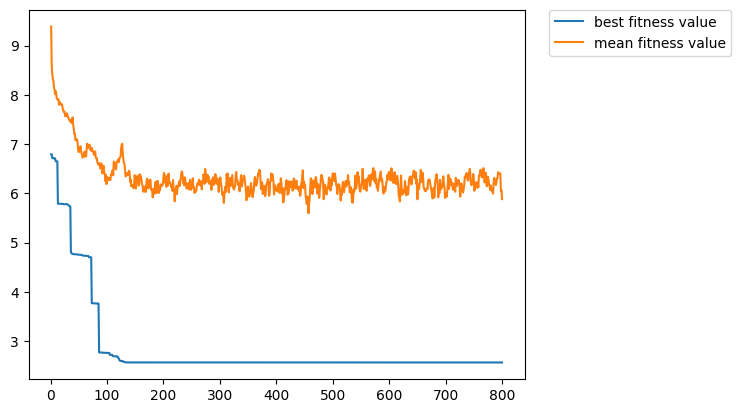

Experiment Id: grover_3qubits_48bc103e-a133-4ff8-b463-83eac2c10bb3
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-28 08:29:57.285299 - 2024-04-30 06:17:14.867973


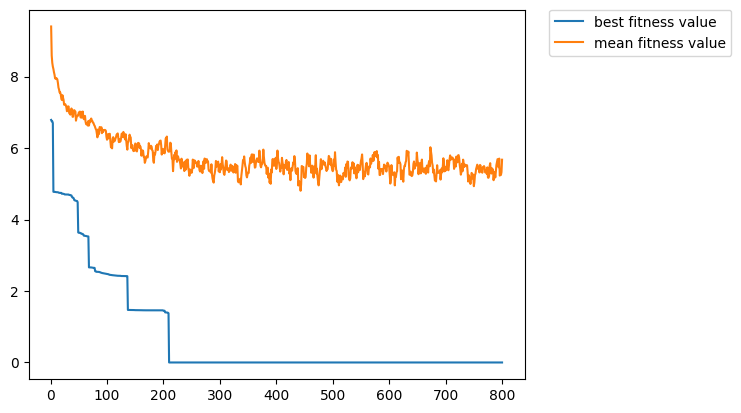

Experiment Id: grover_3qubits_3df568fa-7400-4020-8400-a83df2871f9e
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-29 16:20:19.474454 - 2024-04-30 18:27:56.854221


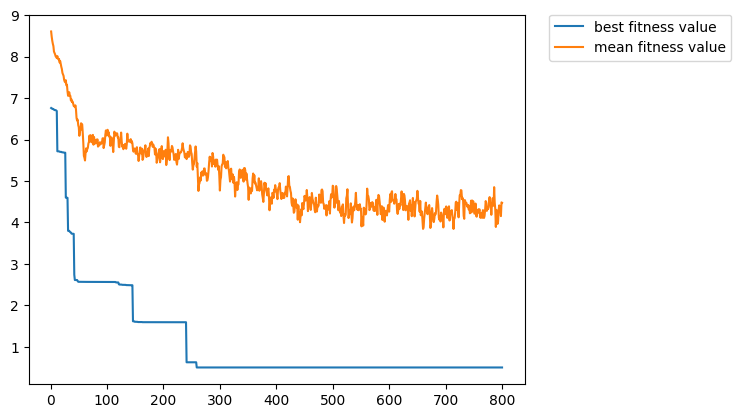

Experiment Id: grover_3qubits_22c921d5-c906-4c42-98d8-b26dc2b4fc16
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-04-30 07:29:33.804387 - 2024-05-02 12:32:36.270730


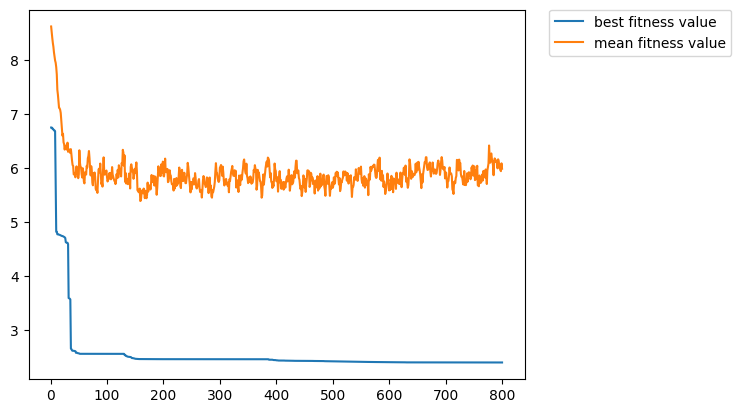

Experiment Id: grover_3qubits_f30dfc5a-46d5-4ef2-9c5c-8a00697312e7
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-01 16:46:38.873043 - 2024-05-02 15:29:02.681677


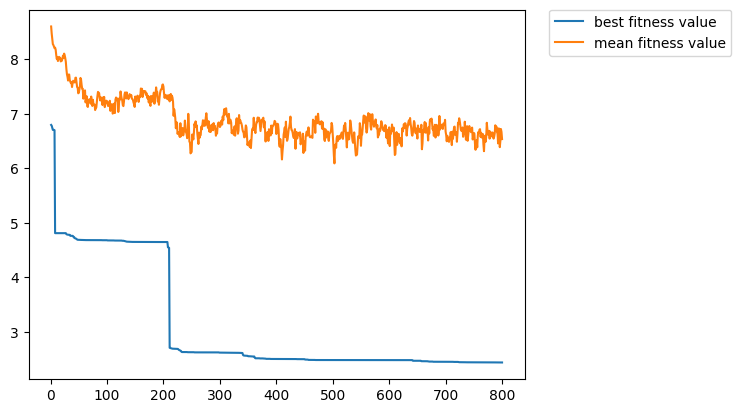

Experiment Id: grover_3qubits_f49be800-0f48-4200-b568-c9fbc2353188
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-02 15:58:51.353076 - 2024-05-02 22:24:10.822483


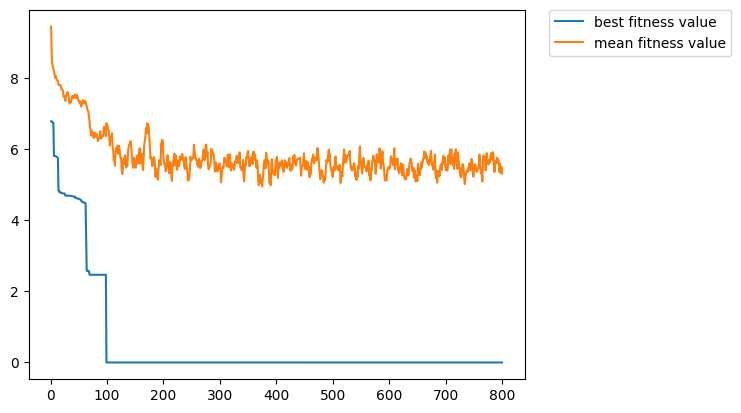

Experiment Id: grover_3qubits_09fc10f7-6ce7-41c2-bbb9-f11e6d85db4f
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-02 16:07:12.086082 - 2024-05-03 03:29:02.431762


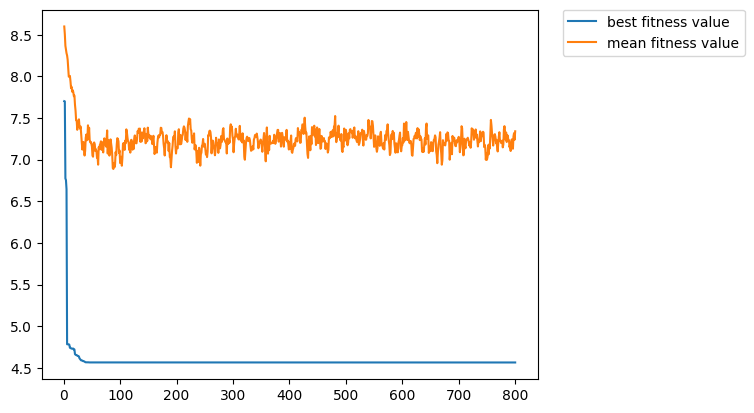

Experiment Id: grover_3qubits_57ddf7c4-7e9b-4417-b1fa-8e8c658748ec
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 07:48:45.465318 - 2024-05-03 13:30:21.765843


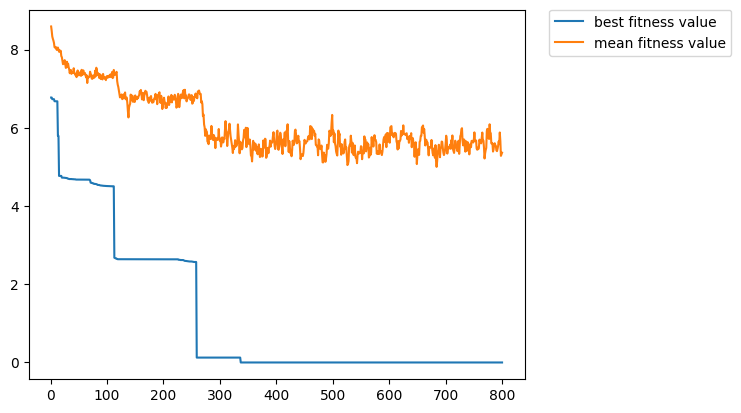

Experiment Id: grover_3qubits_041f3795-cee9-445c-af3a-2d636bbe2d90
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 07:51:01.375171 - 2024-05-03 16:20:55.167964


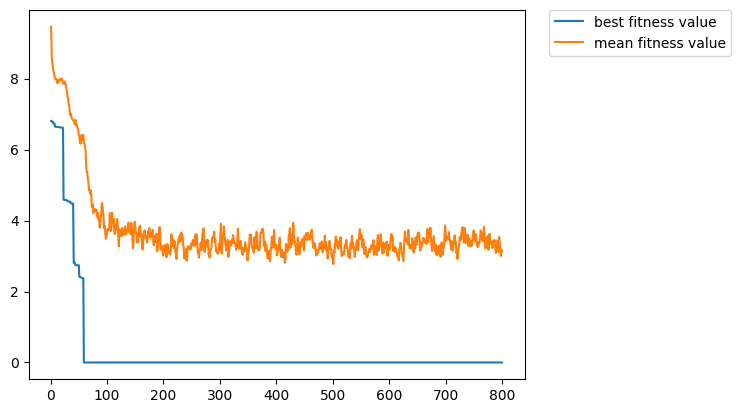

Experiment Id: bernstein_vazirani_3qubits_9ce9449d-8c2b-422a-9e44-6ba87e5403e0
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	NaT - NaT


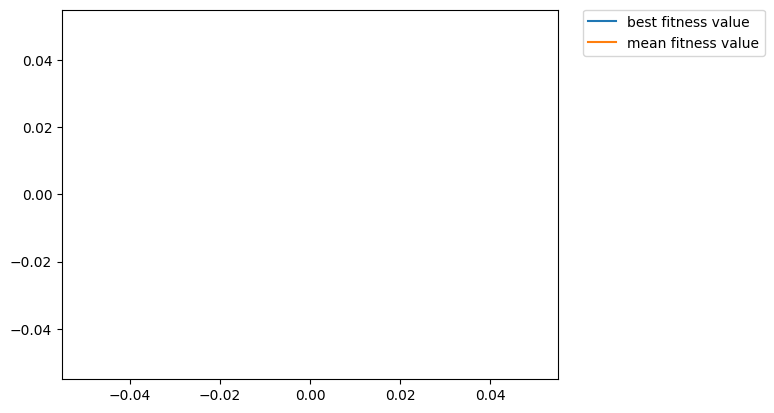

Experiment Id: bernstein_vazirani_3qubits_004e538c-4fe5-4e3f-9193-d4a329cde095
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-03 15:26:29.143867 - 2024-05-03 17:36:08.598277


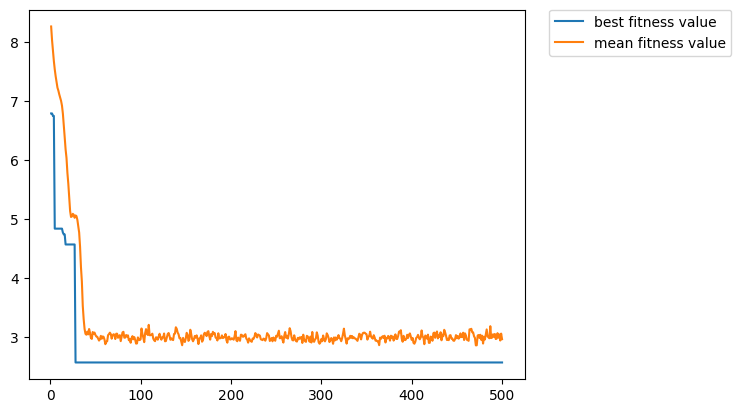

Experiment Id: grover_3qubits_b82ca9a9-ead5-40d0-86b6-ef302ac76aff
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 16:21:42.629130 - 2024-05-04 10:34:27.168287


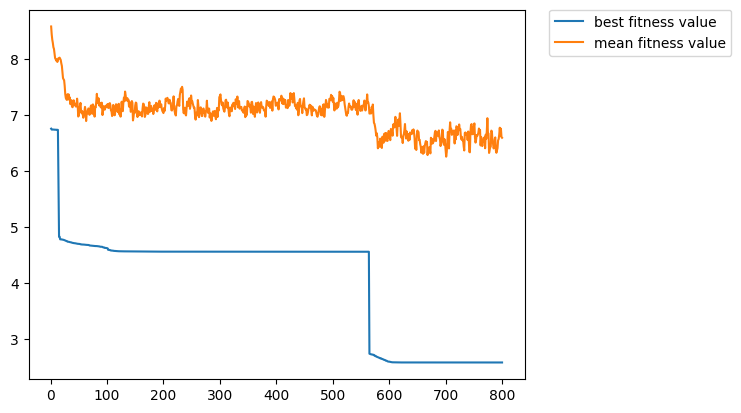

Experiment Id: bernstein_vazirani_3qubits_5a04b29f-de79-47c3-b414-cc9be05a7350
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-03 17:36:29.237609 - 2024-05-03 19:39:11.106254


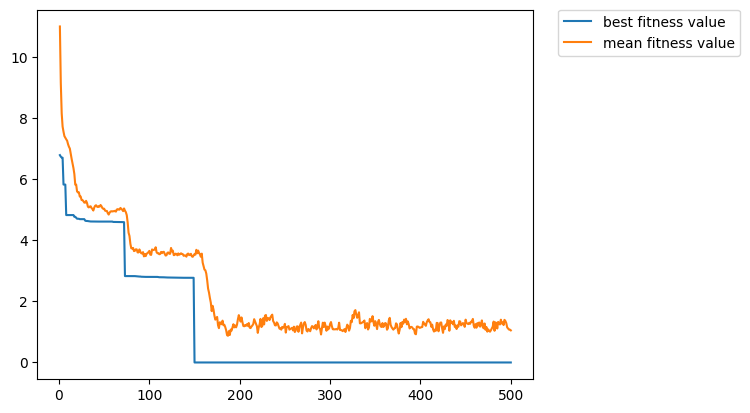

Experiment Id: bernstein_vazirani_3qubits_66faebce-f86f-4d4c-a0ae-30acd3569010
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-03 19:39:30.713050 - 2024-05-03 20:13:11.795411


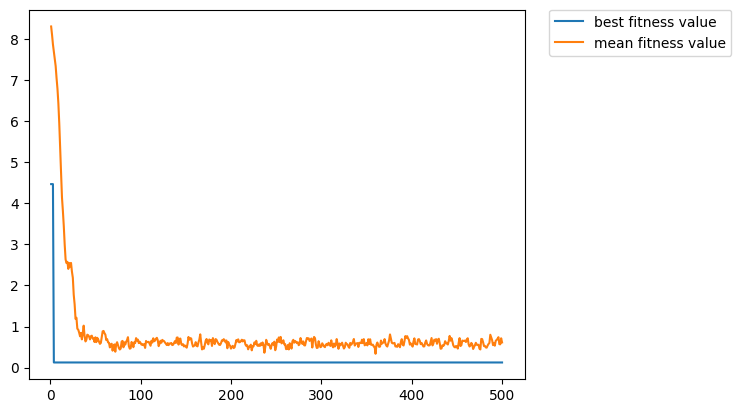

Experiment Id: bernstein_vazirani_3qubits_d44dff94-1887-4485-9fa9-52dd311d0546
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 20:13:31.573167 - 2024-05-03 21:05:38.159796


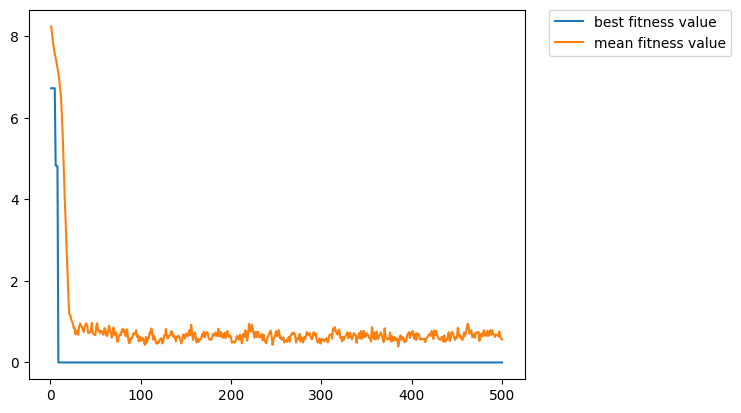

Experiment Id: bernstein_vazirani_3qubits_170674af-f969-4570-812d-bdfab1e635f7
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 21:05:57.823161 - 2024-05-03 22:07:25.591639


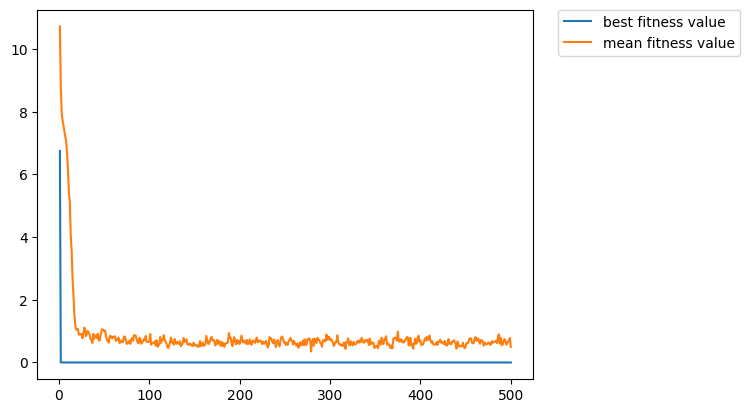

Experiment Id: bernstein_vazirani_3qubits_411a2619-9fa5-423c-bc53-cae9868d76bf
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-03 22:07:45.784566 - 2024-05-04 00:52:58.269800


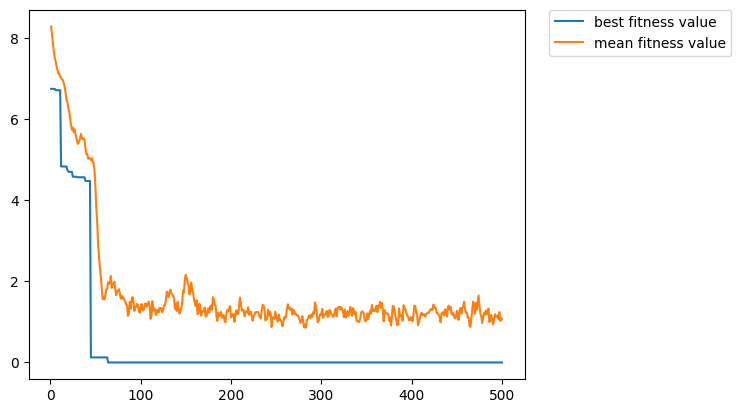

Experiment Id: grover_3qubits_f0dcf74c-80d8-4b92-a1bb-d939ae3c03b1
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 08:17:31.073625 - 2024-05-06 08:28:55.795858


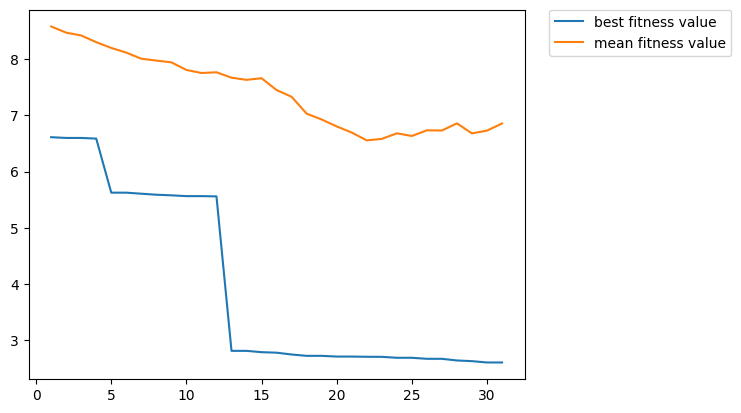

Experiment Id: bernstein_vazirani_3qubits_250d2f0f-5225-483b-9bae-982aa90f8a84
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 08:19:23.771621 - 2024-05-06 08:29:49.763530


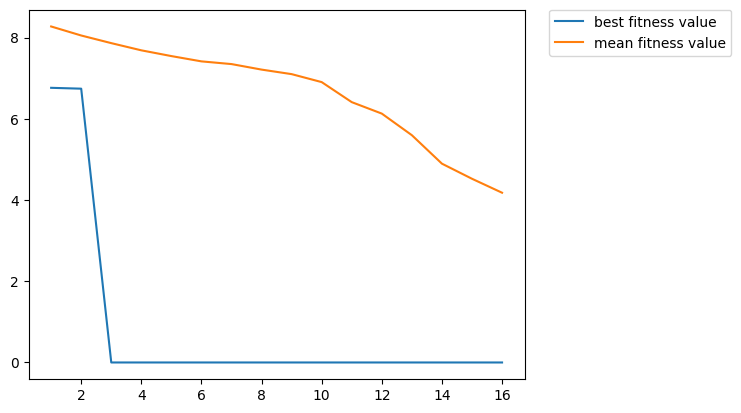

Experiment Id: bernstein_vazirani_3qubits_9766162f-0e9e-4963-9e67-fd64c6de355c
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 08:38:09.515753 - 2024-05-06 10:40:34.788589


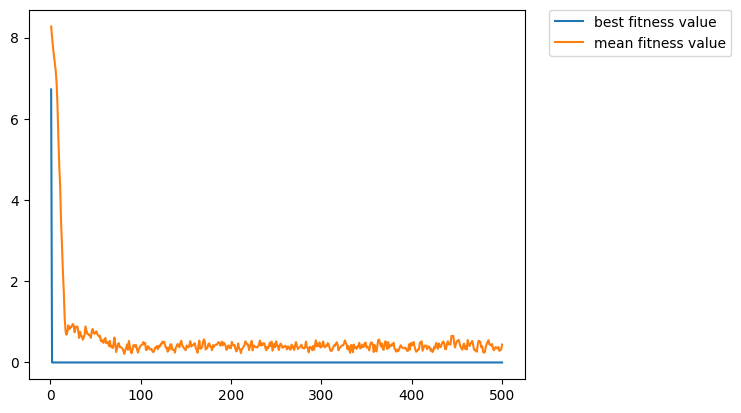

Experiment Id: grover_3qubits_d758b3bb-f072-4fcf-afbb-091dbbee9a09
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 08:38:41.779171 - 2024-05-06 14:15:54.929271


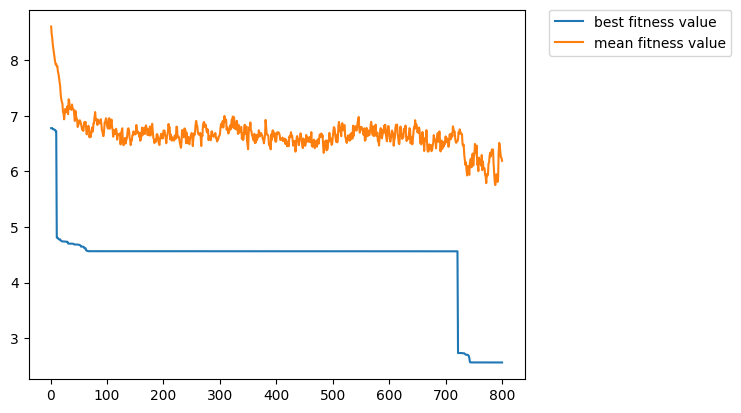

Experiment Id: bernstein_vazirani_3qubits_e7ac30f6-6470-4935-a532-192c96e9a7e3
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 10:41:16.377707 - 2024-05-06 12:54:04.945753


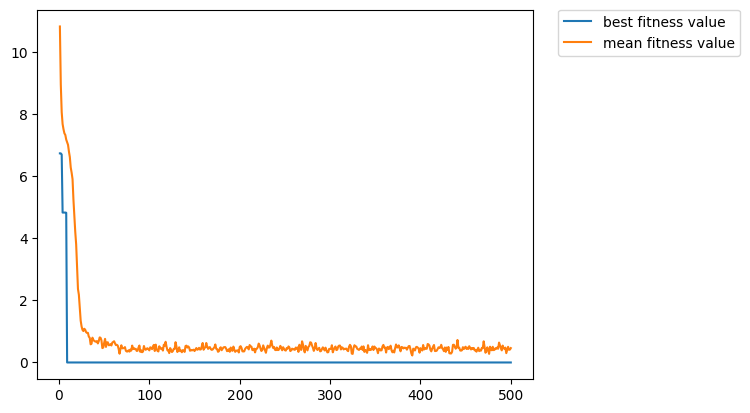

Experiment Id: bernstein_vazirani_3qubits_f1ce8b18-b56f-4c85-817a-3e4e131f4662
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 12:54:44.150562 - 2024-05-06 14:03:22.422048


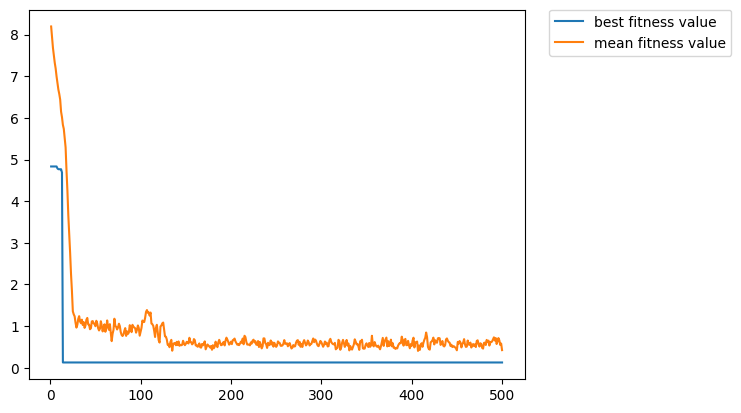

Experiment Id: bernstein_vazirani_3qubits_9c9d9d36-6417-4d9e-867d-8a5e0807e0c3
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-06 14:04:04.613400 - 2024-05-06 15:20:04.147009


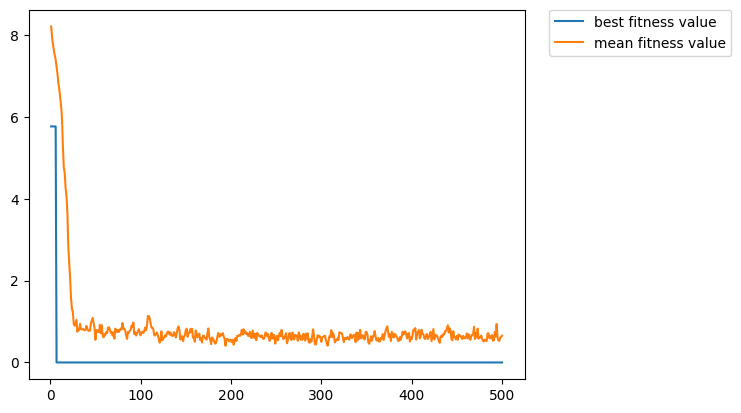

Experiment Id: grover_3qubits_998b53de-b854-441b-8399-811b3f5b6126
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 14:16:17.260638 - 2024-05-06 19:40:58.275831


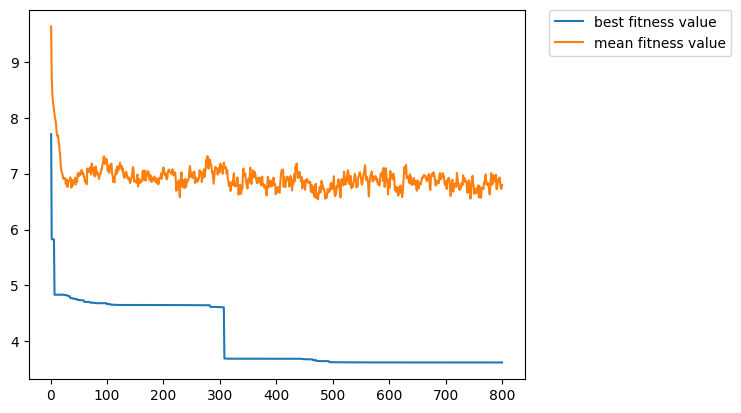

Experiment Id: bernstein_vazirani_3qubits_3815334e-b9d1-4581-8c1b-ce55c7b12aff
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-06 15:20:47.188657 - 2024-05-06 18:29:50.440237


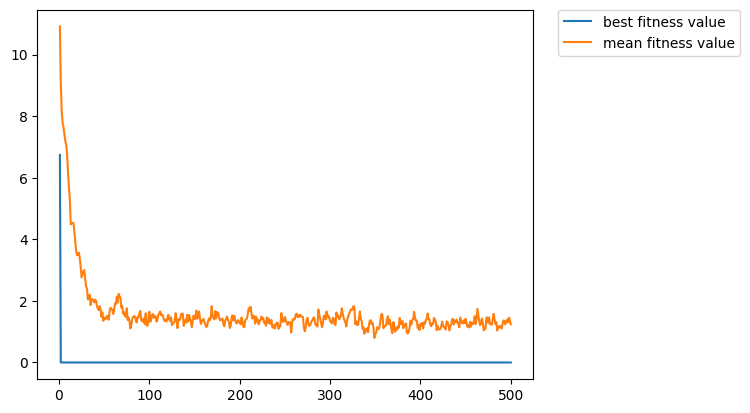

Experiment Id: bernstein_vazirani_3qubits_901c6d8c-6ab9-466d-b451-2c2ebaa06738
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-06 18:30:33.502602 - 2024-05-06 20:16:47.358775


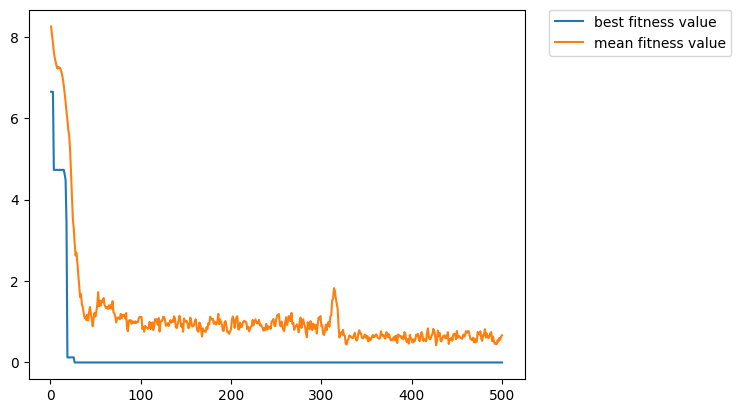

Experiment Id: grover_3qubits_0e8ce9bc-5a99-4a97-9bf8-468cfda3ba05
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-06 19:41:21.375031 - 2024-05-07 01:54:50.568879


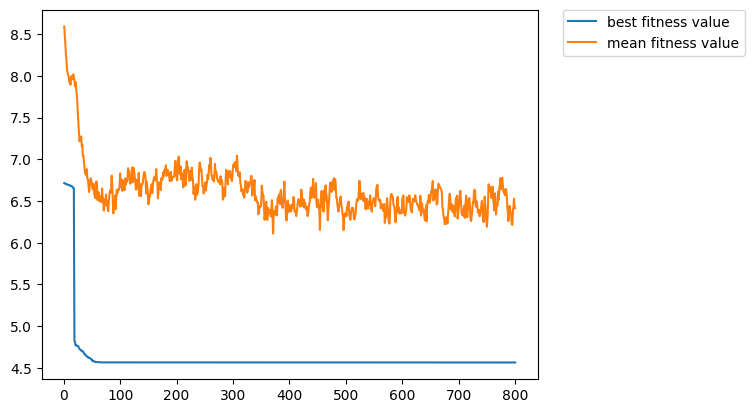

Experiment Id: grover_3qubits_da766979-9829-4a76-a236-498a54103ed0
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-07 01:55:14.137953 - 2024-05-07 13:43:33.800847


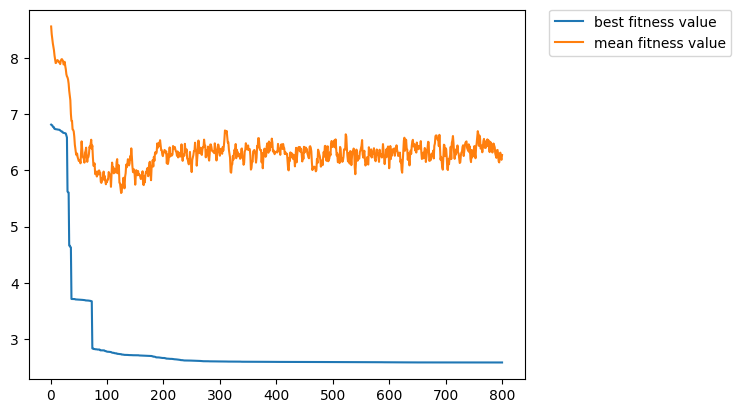

Experiment Id: grover_3qubits_942c2339-6bc6-4682-bcd6-211bc5da6567
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-07 12:09:37.679352 - 2024-05-07 23:15:06.687292


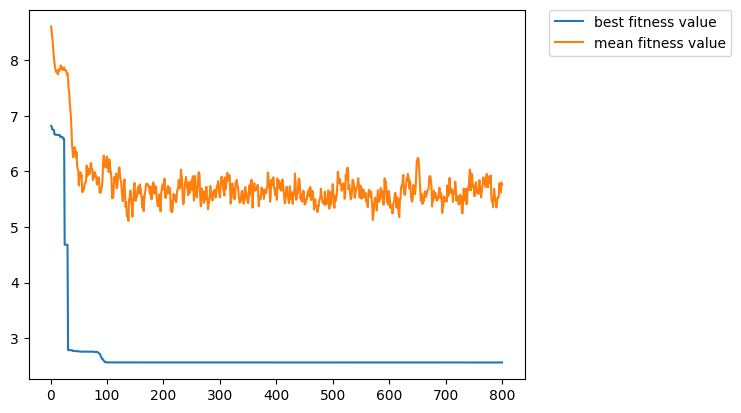

Experiment Id: grover_3qubits_950715b8-1c08-4a05-975d-3dceec4543e5
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-07 13:43:58.055970 - 2024-05-07 22:57:14.355868


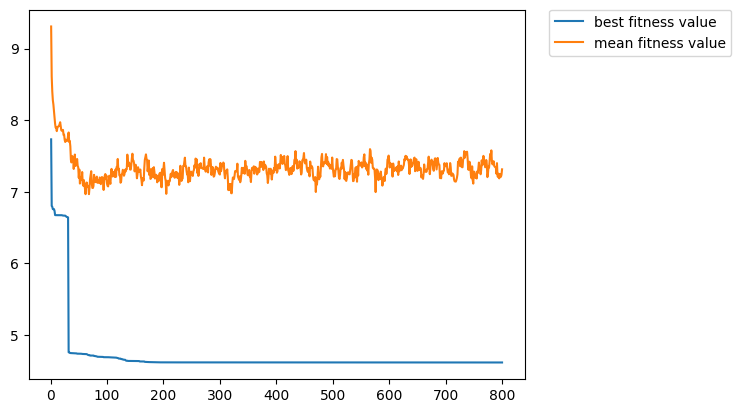

Experiment Id: grover_3qubits_a14e59f5-5b95-4a4f-9294-69da2015535e
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-07 22:57:38.606383 - 2024-05-08 05:45:19.440853


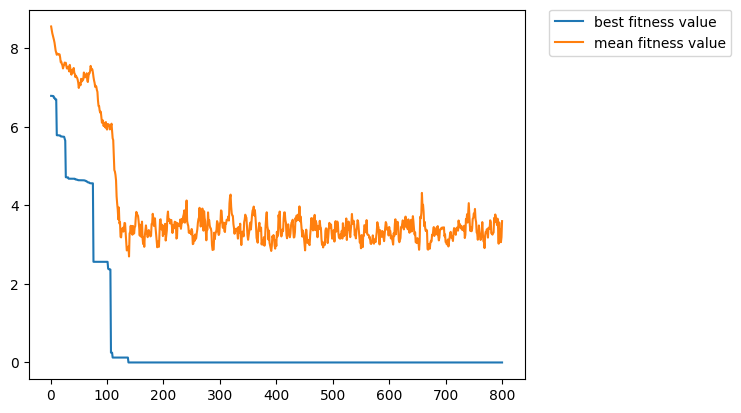

Experiment Id: grover_3qubits_26a717ff-8199-4125-8a9d-f9b144ef2a42
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-07 23:15:51.778553 - 2024-05-08 10:45:00.261906


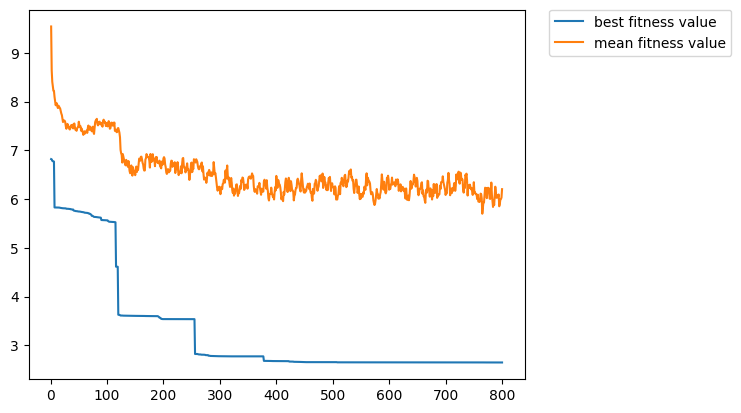

Experiment Id: bernstein_vazirani_3qubits_75a0d3a1-c35a-48ab-9bc2-d6ba74226608
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-08 05:45:40.176480 - 2024-05-08 06:27:42.866522


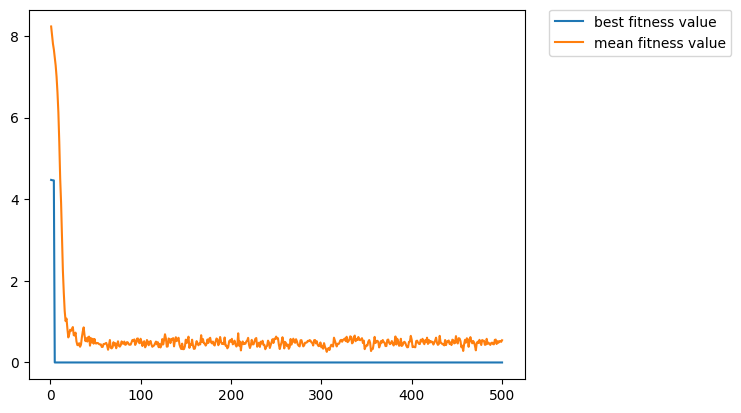

Experiment Id: bernstein_vazirani_3qubits_7bcf5e1d-caae-4686-a7e5-e7a84aeca279
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-08 06:28:02.968127 - 2024-05-08 07:02:05.934192


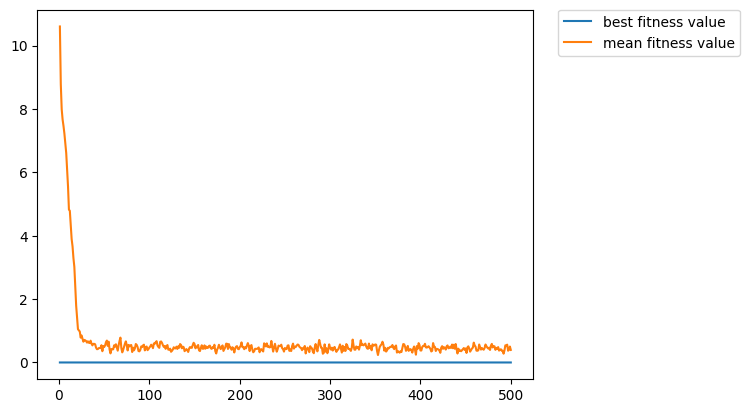

Experiment Id: bernstein_vazirani_3qubits_ab9f2446-05fd-4ea4-81ab-9d705939f27a
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-08 07:02:26.928188 - 2024-05-08 07:46:59.970240


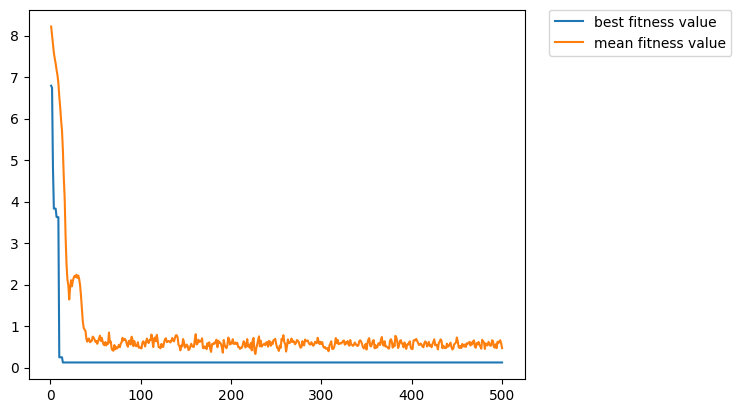

Experiment Id: bernstein_vazirani_3qubits_aee0ee2a-0d49-4c5e-93e3-f83652aed286
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-08 07:47:21.030957 - 2024-05-08 08:43:04.030095


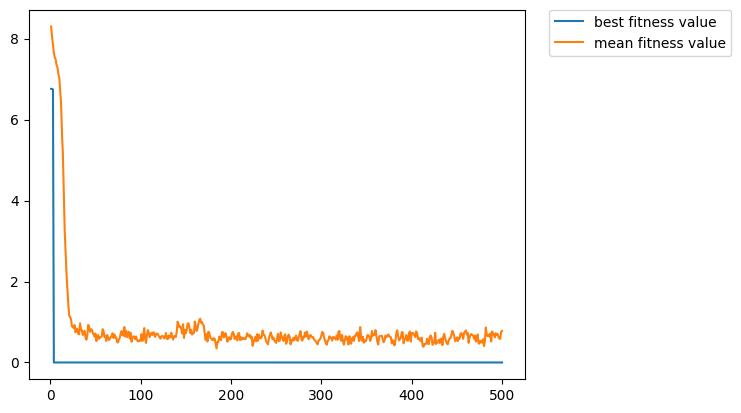

Experiment Id: bernstein_vazirani_3qubits_79f28390-1c2a-419c-8f55-8fe87cf9e022
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-08 08:43:24.063868 - 2024-05-08 09:29:55.387000


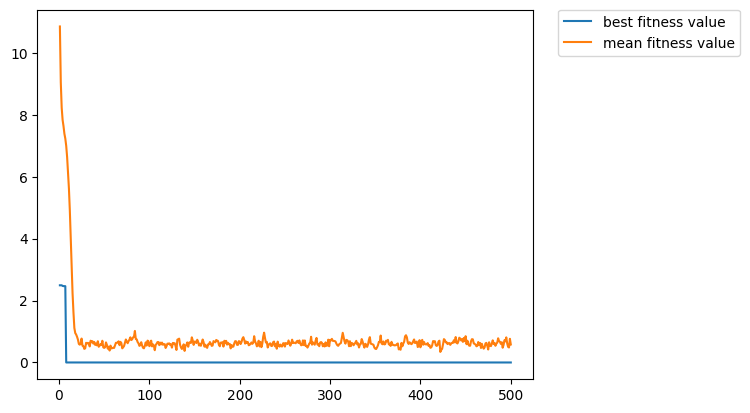

Experiment Id: bernstein_vazirani_3qubits_f6b18d43-5982-493a-9a96-b157e00472cd
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-08 09:30:15.959957 - 2024-05-08 12:44:02.343451


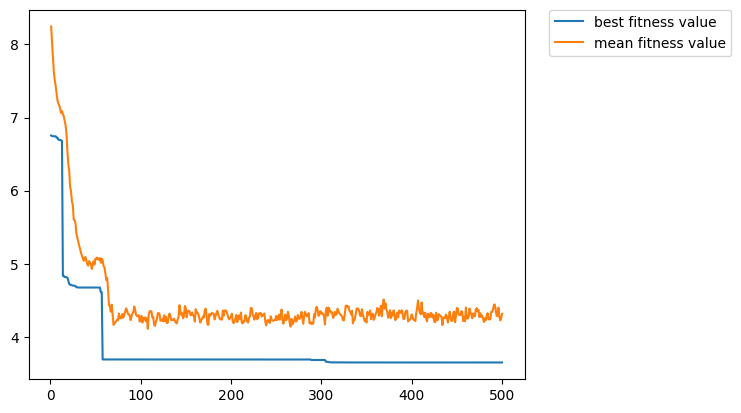

Experiment Id: grover_3qubits_28c9ccc5-cd66-47bc-b5c5-2b9cbb89e47a
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-08 10:45:46.663417 - 2024-05-08 17:34:40.587172


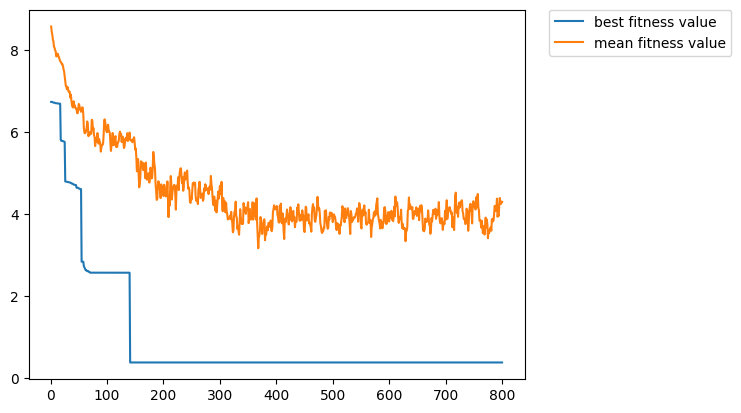

Experiment Id: grover_3qubits_e07ae653-0e34-440a-834f-0bdce67fdf22
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-08 17:35:25.786858 - 2024-05-09 06:55:49.538994


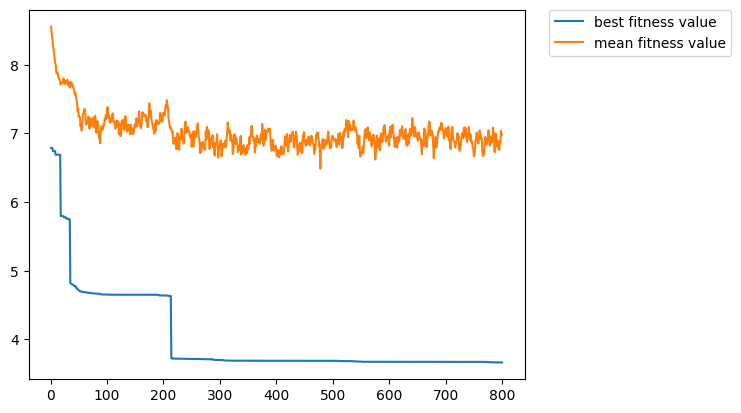

Experiment Id: grover_3qubits_62082352-db98-4a1f-96fa-2a07a0d09553
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-09 06:56:35.639041 - 2024-05-09 19:05:44.880265


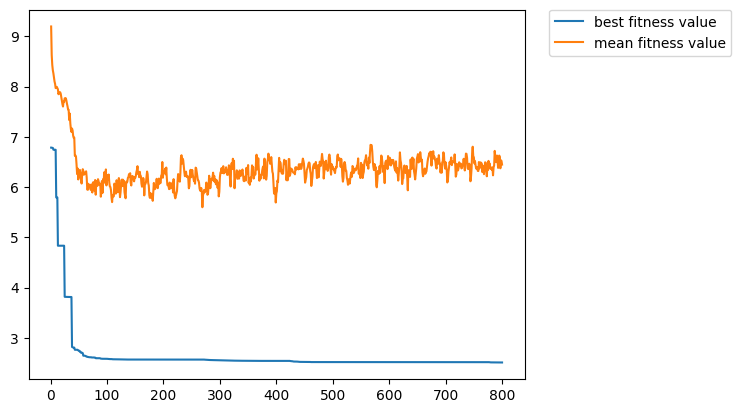

Experiment Id: grover_3qubits_cd80d8e4-506f-47a4-9d62-599a71966897
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-09 18:36:09.727786 - 2024-05-10 00:14:18.583608


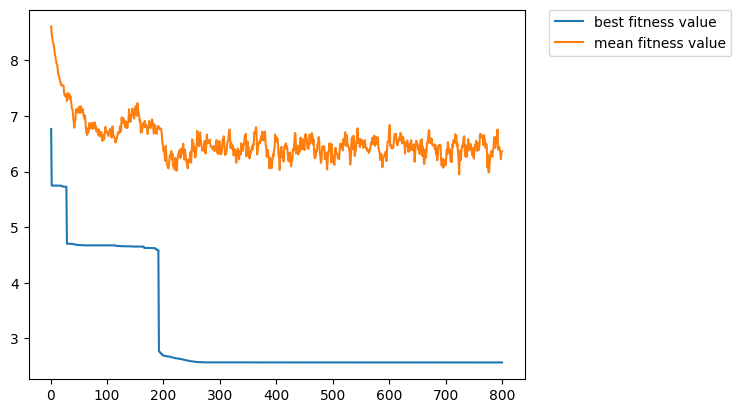

Experiment Id: grover_3qubits_3c6c7598-3c7a-48f6-8ba5-a02db0f65a23
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-09 19:06:30.431019 - 2024-05-10 15:11:30.979307


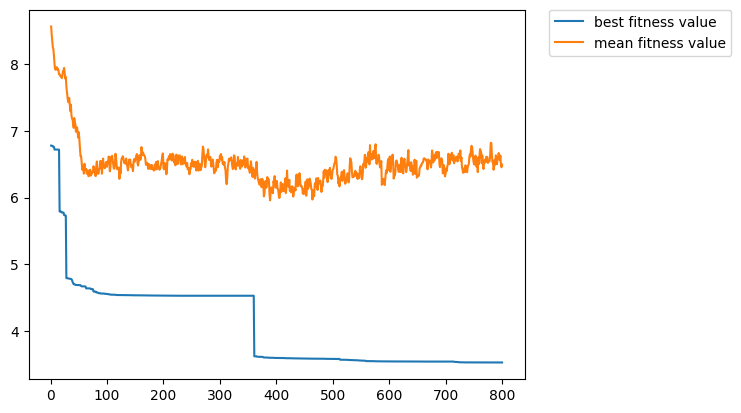

Experiment Id: grover_3qubits_401913f7-6874-44cc-aef8-ac27a0198465
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-10 00:14:41.333454 - 2024-05-10 05:58:24.476750


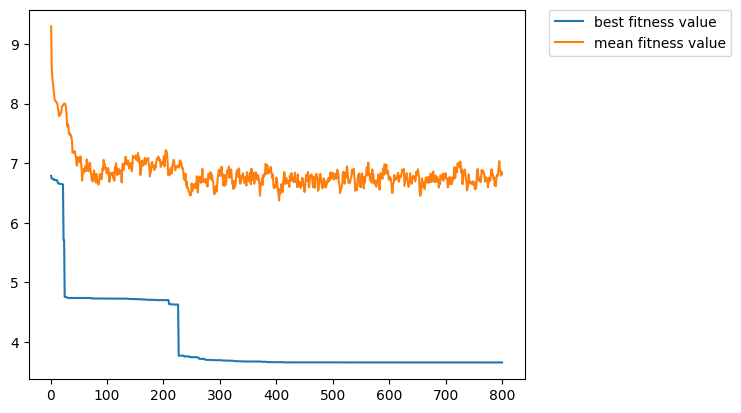

Experiment Id: grover_3qubits_ef438c7e-5b59-4218-845a-d46efb694dc2
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-10 05:58:46.992859 - 2024-05-10 11:16:03.444995


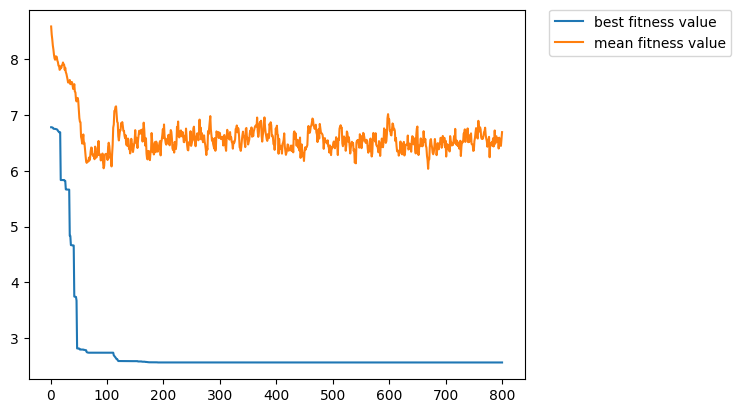

Experiment Id: grover_3qubits_d81bd6ae-5daa-40f7-baaa-c7d99def3676
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-10 11:16:27.225974 - 2024-05-10 16:35:28.944205


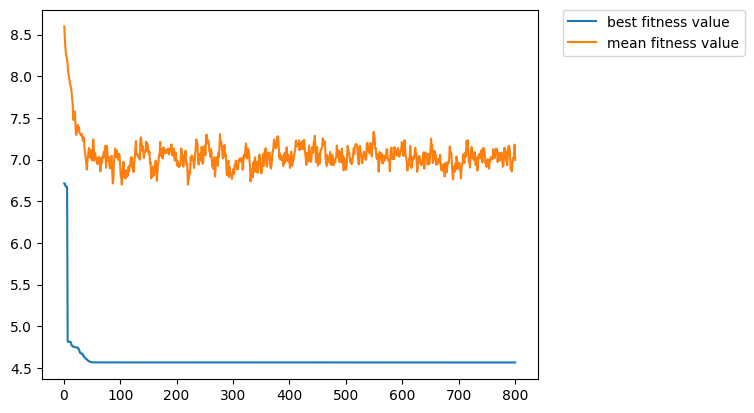

Experiment Id: bernstein_vazirani_3qubits_0e237a07-d8cc-4c87-a9f6-e294b8b8fa6e
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-10 15:12:11.534675 - 2024-05-10 16:45:36.184111


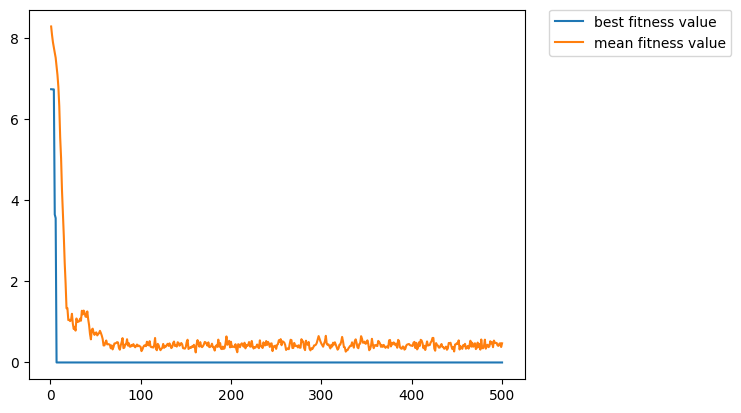

Experiment Id: grover_3qubits_421c4db2-3b29-46a4-8ed0-541231277c03
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-10 16:35:52.037603 - 2024-05-10 22:46:20.217057


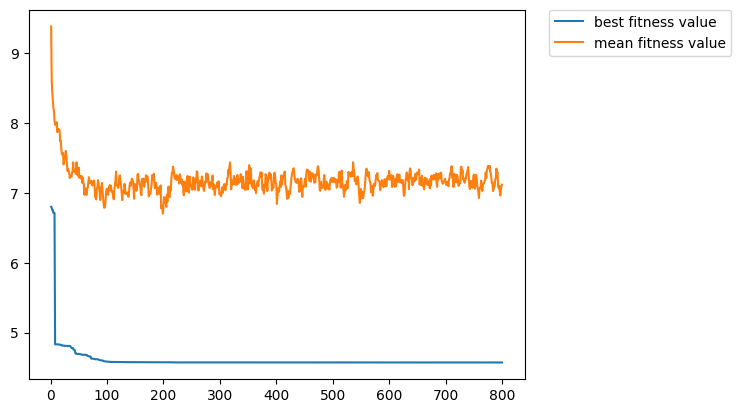

Experiment Id: bernstein_vazirani_3qubits_79211e5d-1df7-409f-a260-150ee01ac983
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-10 16:46:15.452524 - 2024-05-10 17:59:31.620554


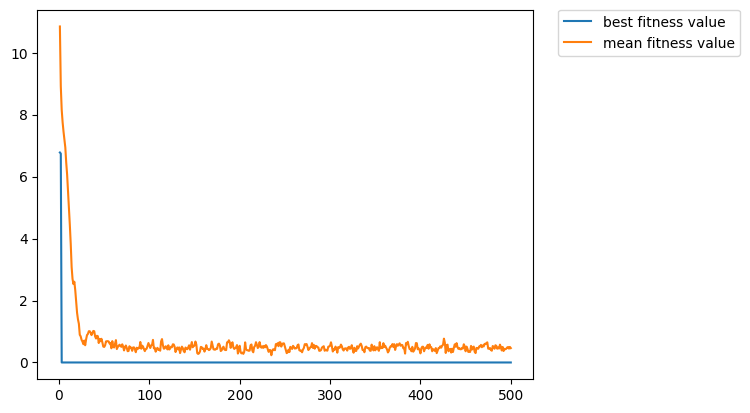

Experiment Id: bernstein_vazirani_3qubits_db48c5a0-b720-4f88-b76b-22711caa6831
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-10 18:00:13.509948 - 2024-05-10 20:17:24.698286


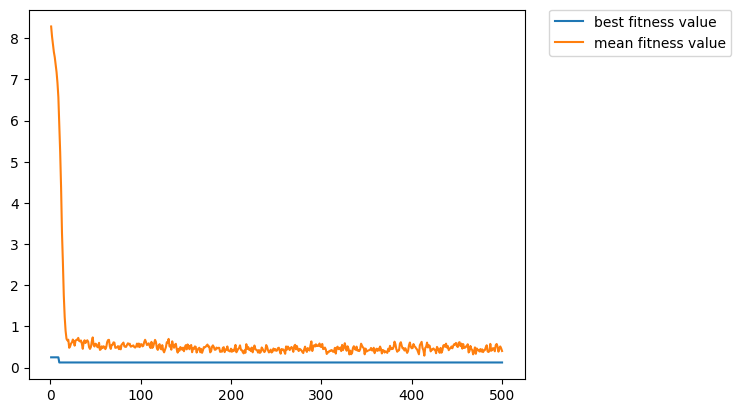

Experiment Id: bernstein_vazirani_3qubits_fef94c79-d0c2-4783-a30a-3e9dbb15f238
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-10 20:18:03.977973 - 2024-05-10 21:51:12.834557


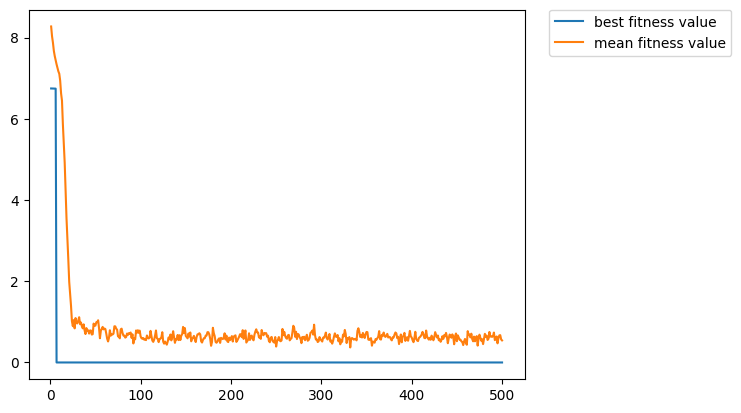

Experiment Id: bernstein_vazirani_3qubits_2db1aa60-743f-4119-a8ae-bd6ad234f9de
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-10 21:51:52.330127 - 2024-05-11 00:13:11.647548


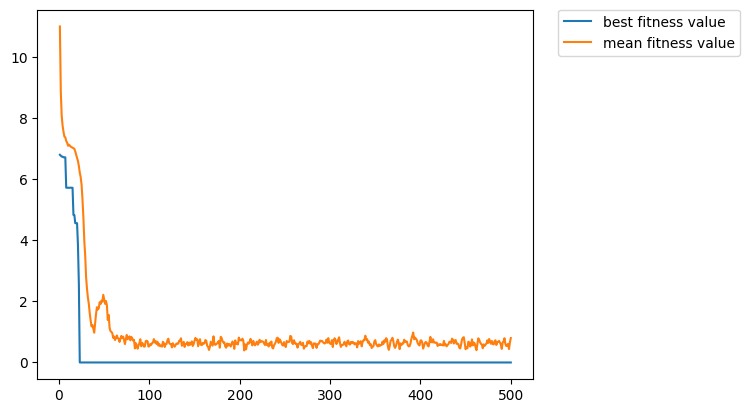

Experiment Id: grover_3qubits_f7ce8a5b-591b-42b1-aad6-c7cc1bbded3e
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-10 22:46:44.096394 - 2024-05-11 06:50:46.424254


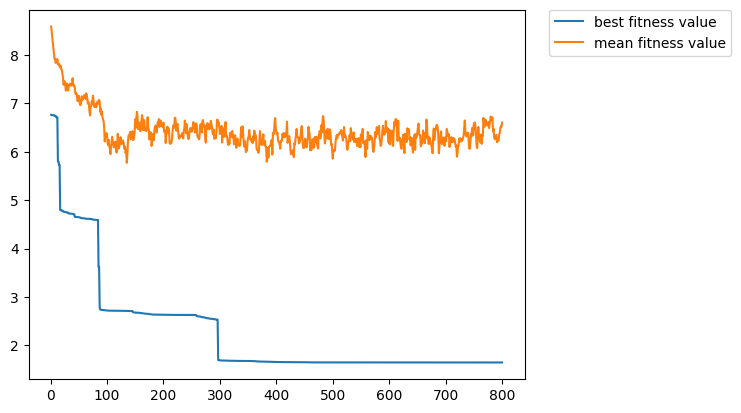

Experiment Id: bernstein_vazirani_3qubits_6974ef0c-5124-4407-b202-f4a3cb1e5b72
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-11 00:13:51.619281 - 2024-05-11 03:23:23.586878


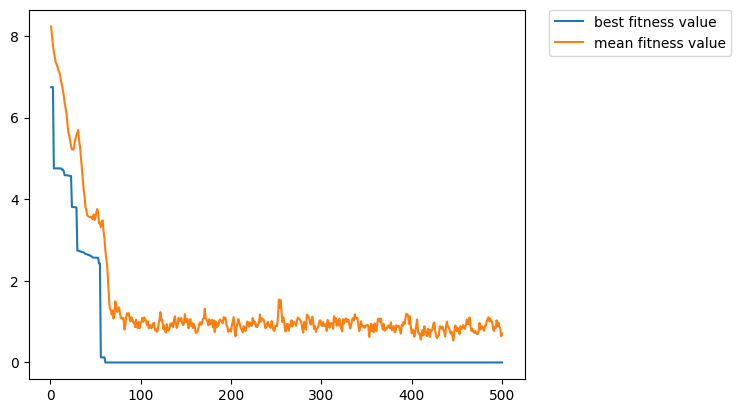

Experiment Id: bernstein_vazirani_3qubits_ab5f2e4e-7f86-42de-9ae1-5b8f975b4f9e
	Configuration: BaselineFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-11 06:51:06.449371 - 2024-05-11 09:54:41.941637


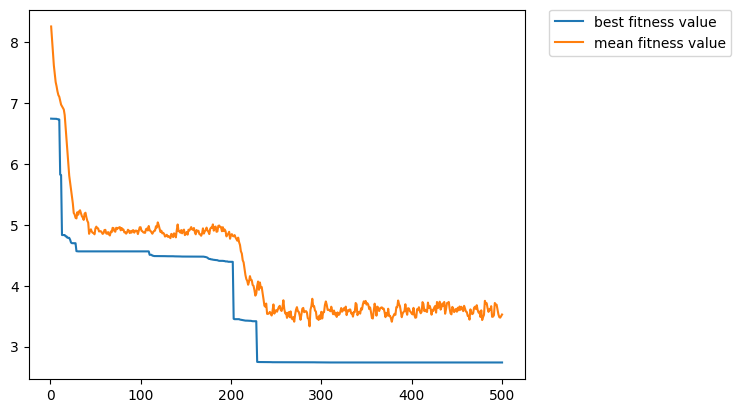

Experiment Id: bernstein_vazirani_3qubits_55698cdc-cfab-48e5-bd89-f7aeca59305b
	Configuration: IndirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-11 09:55:02.092959 - 2024-05-11 11:21:34.437399


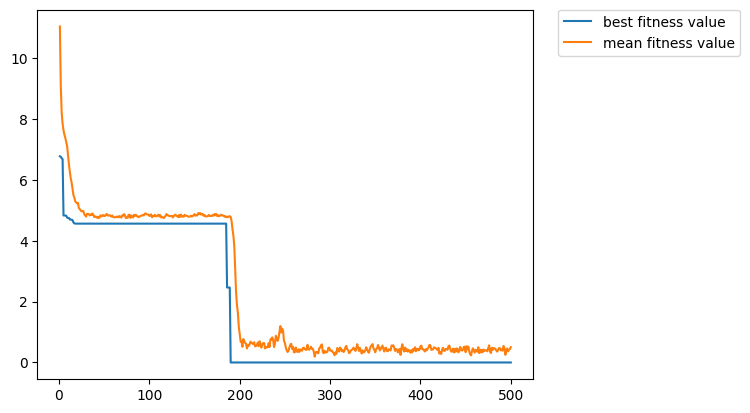

Experiment Id: bernstein_vazirani_3qubits_303440c4-062d-4063-a7b6-a876c3a16e0e
	Configuration: DirectQAFitness; no abstraction learning
	Fitness Function: DirectQAFitness
	2024-05-11 11:21:54.918405 - 2024-05-11 12:27:42.211806


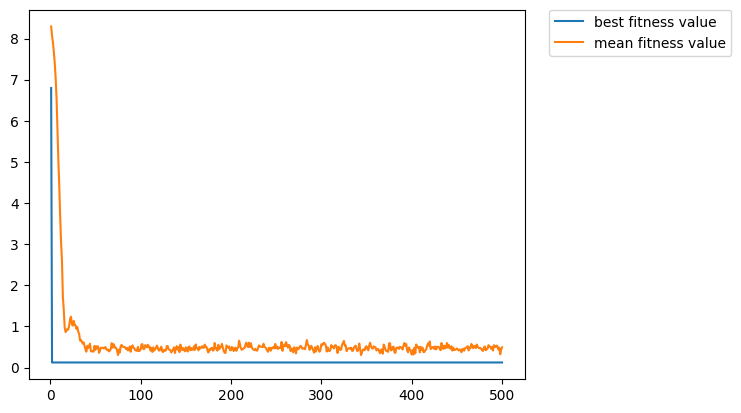

Experiment Id: bernstein_vazirani_3qubits_ffe6b734-2570-4cec-b03b-5d51f6726d40
	Configuration: BaselineFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-11 12:28:02.655242 - 2024-05-11 14:25:41.915942


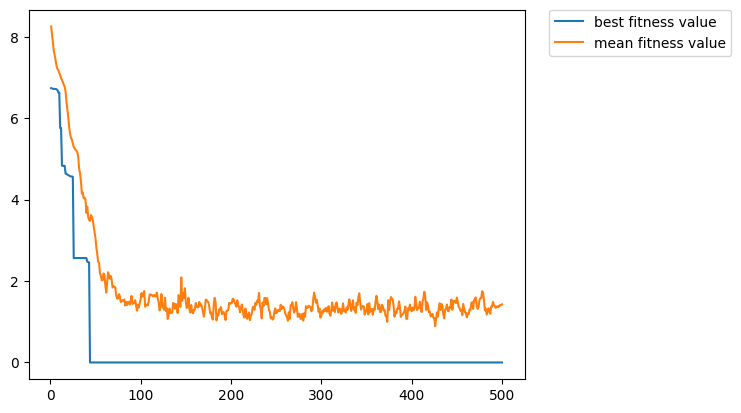

Experiment Id: bernstein_vazirani_3qubits_896274d6-97a3-429c-a1c1-8628cb8ed828
	Configuration: IndirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-11 14:26:01.932614 - 2024-05-11 15:07:54.718961


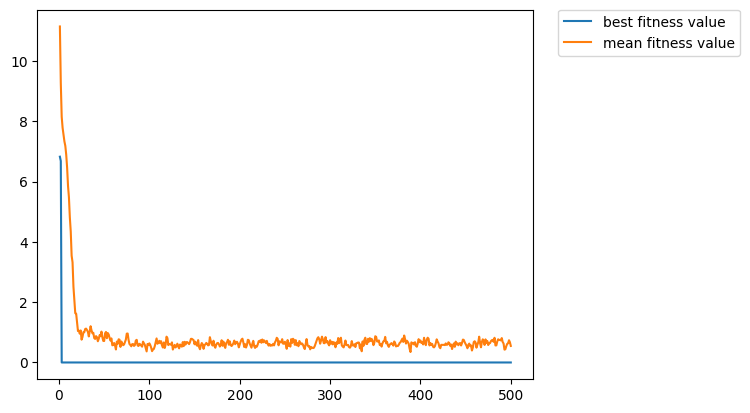

Experiment Id: bernstein_vazirani_3qubits_a2ebce86-d905-4eb7-ac1a-08b978936898
	Configuration: DirectQAFitness; abstraction learning enabled
	Fitness Function: DirectQAFitness
	2024-05-11 15:08:15.443684 - 2024-05-11 16:09:09.046998


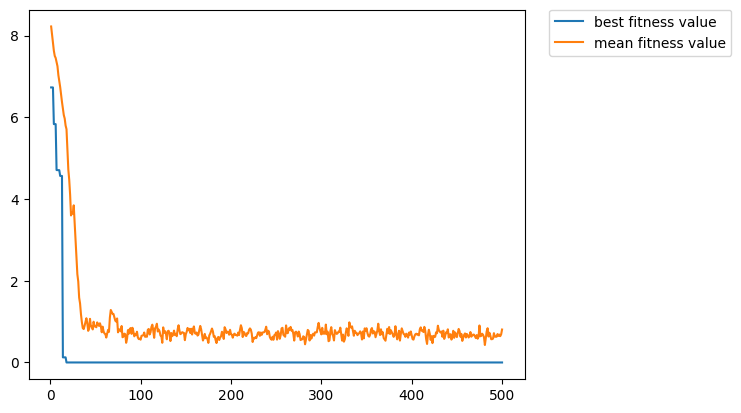

In [24]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\tConfiguration: {configuration}")
    print(f"\tFitness Function: {fitness}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")
    
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

Development of best fitness values:


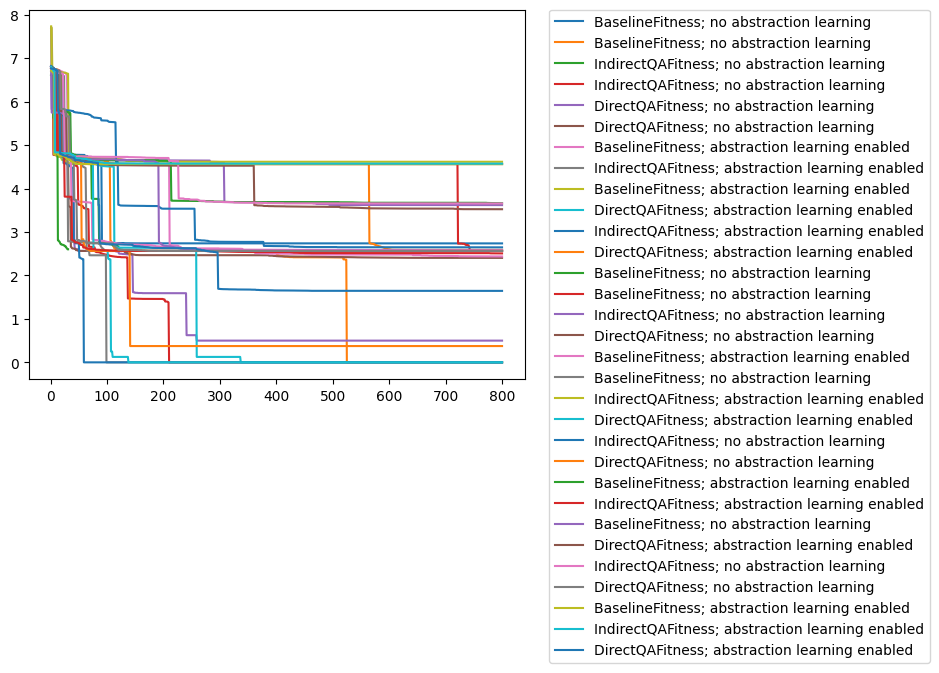

In [29]:
EVALUATION_CASE = "grover" # bernstein

experiment_ids = experiments["experiment_id"].unique()
legend = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    if not experiment_id.startswith(EVALUATION_CASE):
        continue
    
    configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
    legend.append(configuration)
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
    
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])

print("Development of best fitness values:")
plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Development of mean fitness values:


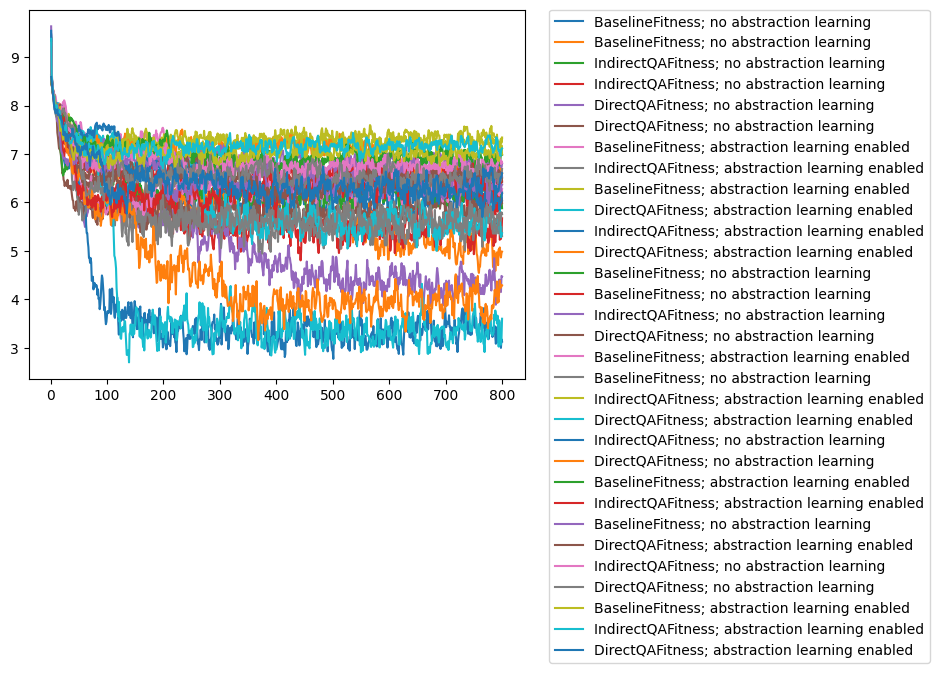

In [32]:
EVALUATION_CASE = "grover" # bernstein

experiment_ids = experiments["experiment_id"].unique()
legend = []

ax = plt.subplot()

for experiment_id in experiment_ids:
    if not experiment_id.startswith(EVALUATION_CASE):
        continue
    
    configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
    legend.append(configuration)
    
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])

print("Development of mean fitness values:")
plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Development of mean fitness values for BaselineFitness; no abstraction learning:


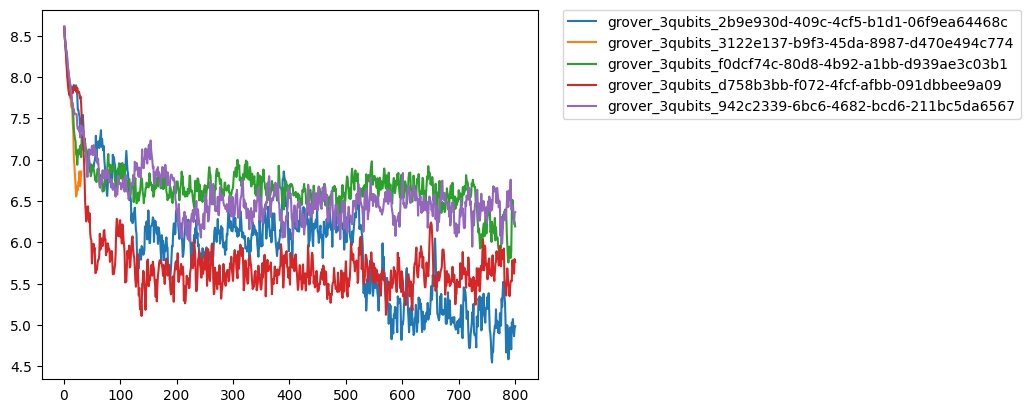

Development of mean fitness values for IndirectQAFitness; no abstraction learning:


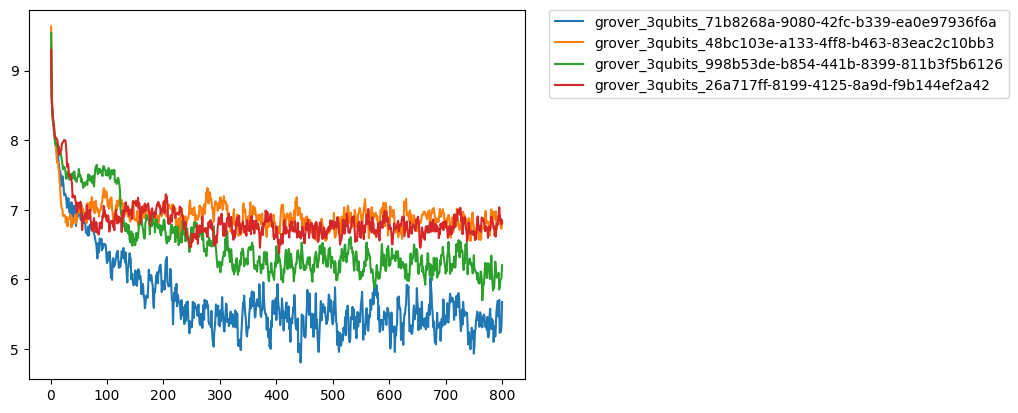

Development of mean fitness values for DirectQAFitness; no abstraction learning:


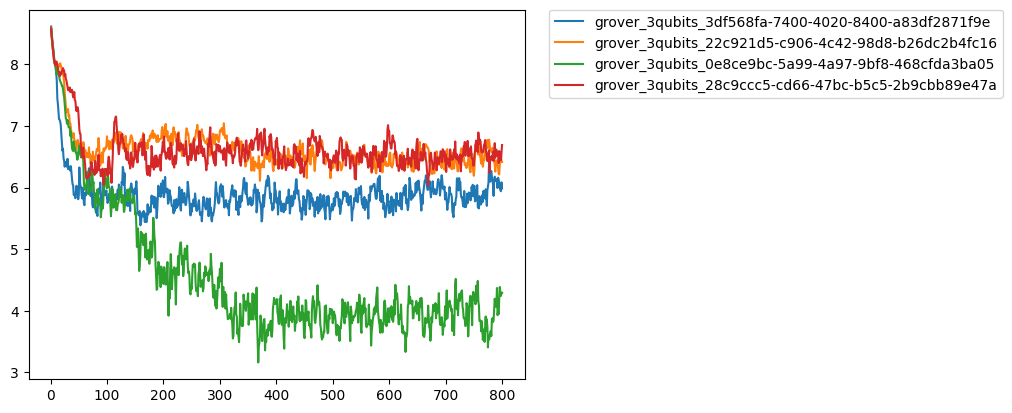

Development of mean fitness values for BaselineFitness; abstraction learning enabled:


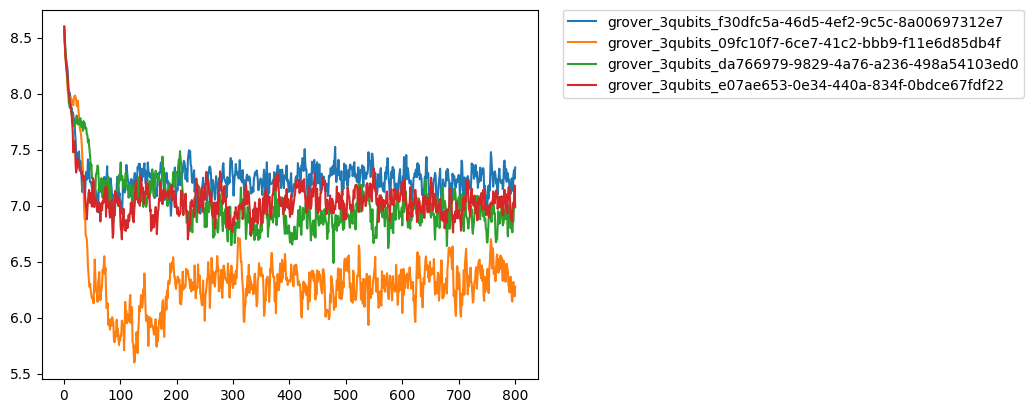

Development of mean fitness values for IndirectQAFitness; abstraction learning enabled:


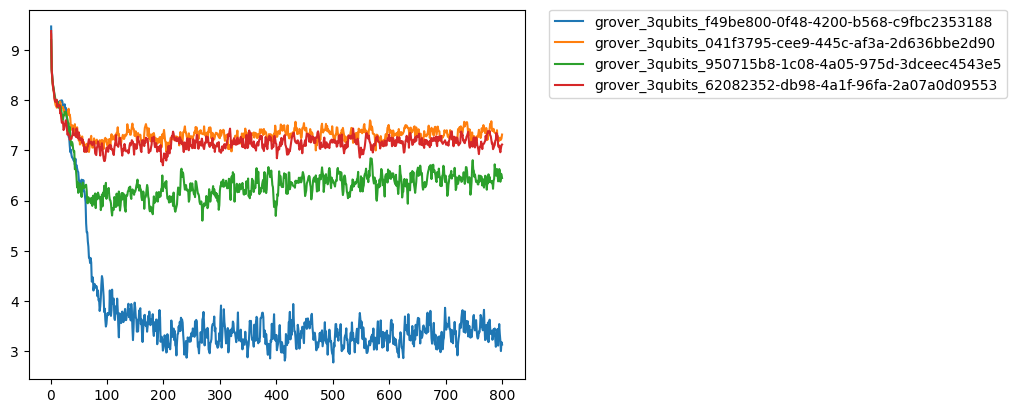

Development of mean fitness values for DirectQAFitness; abstraction learning enabled:


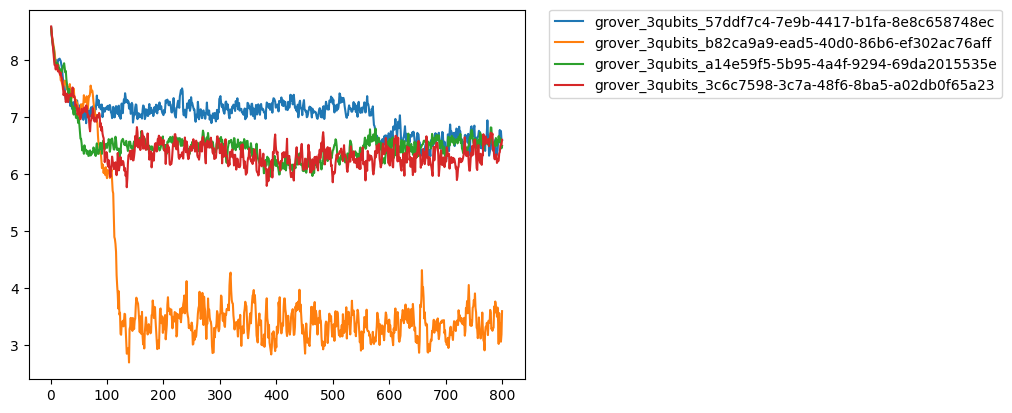

In [33]:
# Group by configuration
EVALUATION_CASE = "grover" # bernstein

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        if not experiment_id.startswith(EVALUATION_CASE):
            continue
        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
        ax = plt.subplot()
    
    print(f"Development of mean fitness values for {configuration}:")
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()


Development of best fitness values for BaselineFitness; no abstraction learning:


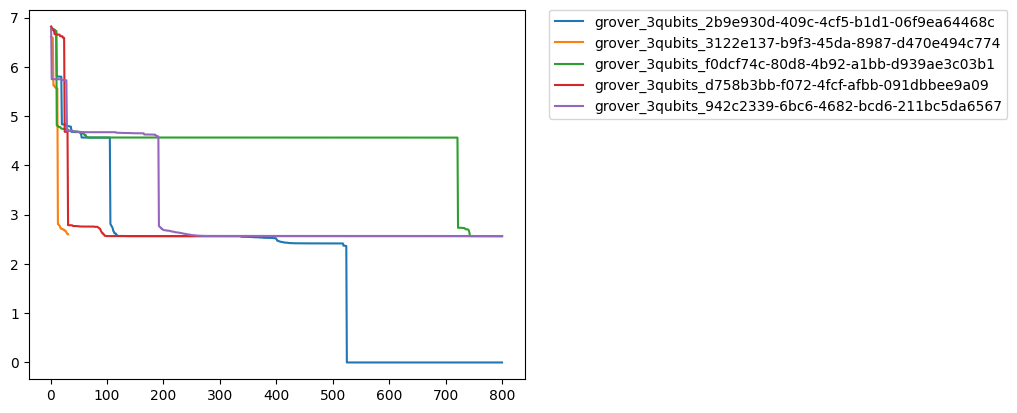

Development of best fitness values for IndirectQAFitness; no abstraction learning:


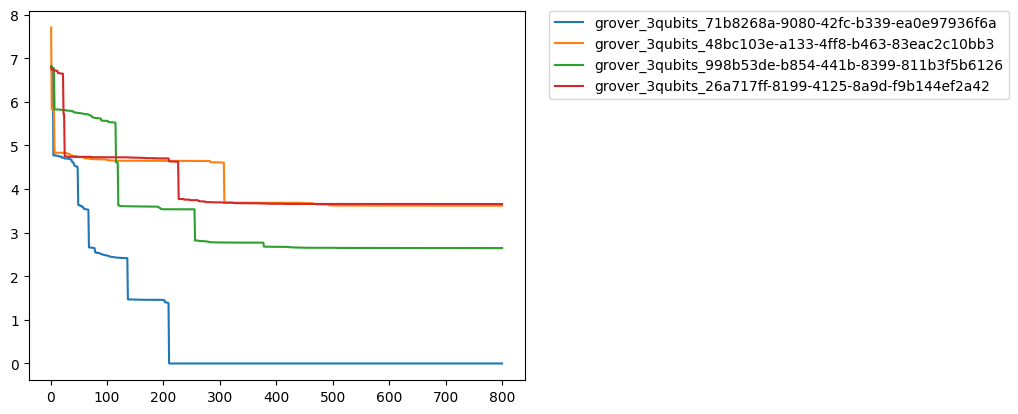

Development of best fitness values for DirectQAFitness; no abstraction learning:


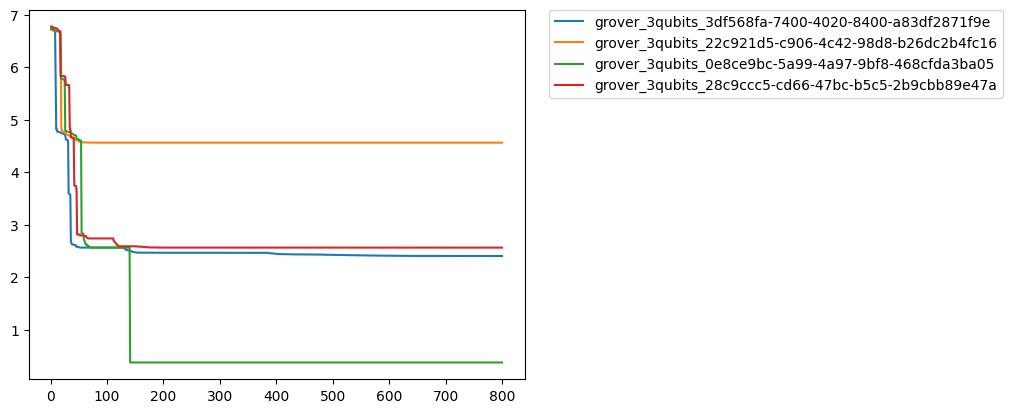

Development of best fitness values for BaselineFitness; abstraction learning enabled:


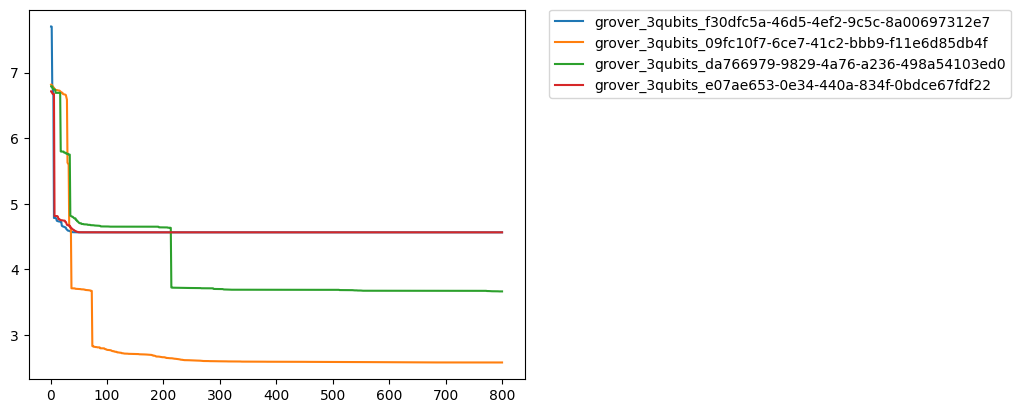

Development of best fitness values for IndirectQAFitness; abstraction learning enabled:


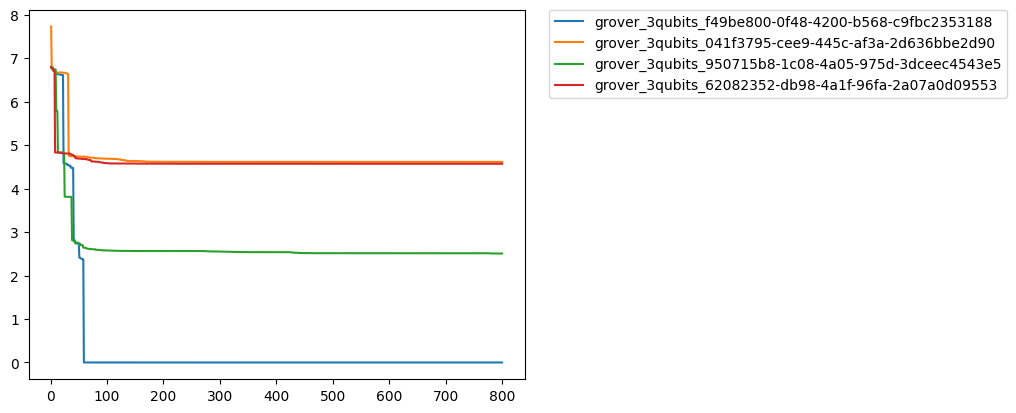

Development of best fitness values for DirectQAFitness; abstraction learning enabled:


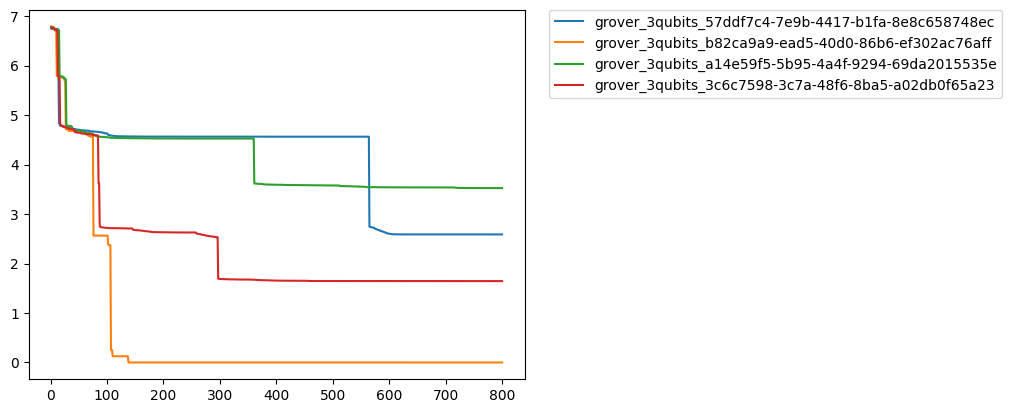

In [34]:
# Group by configuration
EVALUATION_CASE = "grover" # bernstein

configurations = experiments["configuration"].unique()
experiment_ids = experiments["experiment_id"].unique()

for configuration in configurations:
    legend = []

    for experiment_id in experiment_ids:
        if not experiment_id.startswith(EVALUATION_CASE):
            continue
        
        current_configuration = experiments.loc[experiments["experiment_id"] == experiment_id]["configuration"].tolist()[0].strip()
        if current_configuration != configuration:
            continue

        legend.append(experiment_id)
        
        current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
        
        ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
        ax = plt.subplot()
    
    print(f"Development of best fitness values for {configuration}:")
    plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()


## Print the best gate sequence of each experiment

In [21]:
for i, experiment in experiments.iterrows():
    print(f"\nExperiment Id: {experiment['experiment_id']}")
    print(f"\tDescription: {experiment['description']}")
    print(f"\tFitness Function: {experiment['fitness']}")
    print(f"\tLast commit id: {experiment['last_commit_id']}")

    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment["experiment_id"]]
    last_fitness_row = current_fitness_values[current_fitness_values["generation"] == current_fitness_values["generation"].max()]
    
    print(f"\tBest fitness value: {last_fitness_row['best_fitness_value'].tolist()[0]}")
    print(f"\tBest chromosome: {last_fitness_row['best_chromosome'].tolist()[0]}")



Experiment Id: grover_3qubits_2b9e930d-409c-4cf5-b1d1-06f9ea64468c
	Description:  
	Fitness Function: BaselineFitness
	Last commit id:  016489a2b9c58ccf0eb818f6eafc9cf4fee2778a
	Best fitness value: 2.7380662945214462
	Best chromosome:  [cx(control=0,target=1), crx(theta=3.1415897441286376,control=2,target=1), rz(theta=-3.1057422463666335,target=1), rz(theta=-3.141592653589793,target=1), ry(theta=-2.254369266484492,target=0), oracle(target1=2,target2=0,target3=1), y_layer(), rz(theta=-0.3385159150708108,target=2), h(target=1), swap_layer(), rz(theta=2.5289152883063983,target=0), h_layer(), ry(theta=-1.9003983408928566,target=1), cx(control=2,target=1), ry(theta=-3.141592653589793,target=2), oracle(target1=2,target2=0,target3=1), cx(control=1,target=2), cry(theta=-1.5660205306448192,control=2,target=0), cy(control=0,target=1), cx(control=0,target=2), y(target=1), ccz(control1=2,control2=1,target=0), cx(control=1,target=2), x(target=0), ccz(control1=0,control2=1,target=2), h(target=1), c

IndexError: list index out of range

In [ ]:
experiments